**Create your own project Create a completely new project and choose another two of the hundreds of World Bank indicators and see if there is any correlation between them. If there is a choice of similar indicators, choose one that leads to meaningful comparisons between countries.**



# **GDP and Ageing population**

Assessing the relationship between Percentage of population over 65 years old and the GDP.

**1. Getting Data**

In [3]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
from pandas_datareader.wb import download


YEAR = 2013
age_indicator = 'SP.POP.65UP.TO'
pop_indicator = 'SP.POP.TOTL'
gdp_indicator = 'NY.GDP.MKTP.CD'


ages = download(indicator=age_indicator, country='all', start=YEAR, end=YEAR)[47:].dropna().reset_index()
pop = download(indicator=pop_indicator, country='all', start=YEAR, end=YEAR)[47:].dropna().reset_index()
gdp = download(indicator=gdp_indicator, country='all', start=YEAR, end=YEAR)[47:].dropna().reset_index()

ages.head()

,country,year,SP.POP.65UP.TO
0,Afghanistan,2013,780991.0
1,Albania,2013,340775.0
2,Algeria,2013,2149858.0
3,Angola,2013,604290.0
4,Antigua and Barbuda,2013,7124.0


Rounding off GDP  to the nearest million, and the population to the nearest thousand.


In [4]:
def roundToMillions(g_d_p):
    return round(g_d_p/1000000)

GDP = 'GDP in $m'
COUNTRY = 'country'

gdp[GDP] = gdp[gdp_indicator].apply(roundToMillions)
gdpClean = gdp[[COUNTRY, GDP]]

gdpClean.head()

,country,GDP in $m
0,Afghanistan,20561
1,Albania,12776
2,Algeria,209724
3,American Samoa,641
4,Andorra,3194


Rounding off population to nearest thousand

In [5]:
def roundToThousands(population):
    return round(population/1000)

POP = 'Population (1000s)'

pop[POP] = pop[pop_indicator].apply(roundToThousands)
popClean = pop[[COUNTRY, POP]]

popClean.head()

,country,Population (1000s)
0,Afghanistan,32270
1,Albania,2895
2,Algeria,38140
3,American Samoa,56
4,Andorra,81


Rounding off population above 65 to 1decimal point

In [6]:
AGE = 'Percentage of population above 65'
def round1dp(a):
    return round(a, 1)
ages[AGE] = ages[age_indicator].apply(round1dp)
agesClean = ages[[COUNTRY, AGE]]

In [8]:
ages_gdp = pd.merge(agesClean, gdpClean, on=COUNTRY, how='inner')
df = ages_gdp_pop = pd.merge(ages_gdp, popClean, on=COUNTRY, how='inner')
df.head()

,country,Percentage of population above 65,GDP in $m,Population (1000s)
0,Afghanistan,780991.0,20561,32270
1,Albania,340775.0,12776,2895
2,Algeria,2149858.0,209724,38140
3,Angola,604290.0,136710,26016
4,Antigua and Barbuda,7124.0,1181,92


**2.Data Analysis**

Calculating Spearman rank correlation coefficient and the p-value to determine statistical significance.

**Age and GDP**

In [9]:
from scipy.stats import spearmanr
(r, p) = spearmanr(df[AGE], df[GDP])
print('The correlation is ', r)
if p < 0.05:
    print('Statistically significant.')
else:
    print('Not statistically significant')

The correlation is  0.8581034210651879
Statistically significant.


<AxesSubplot:xlabel='GDP in $m', ylabel='Percentage of population above 65'>

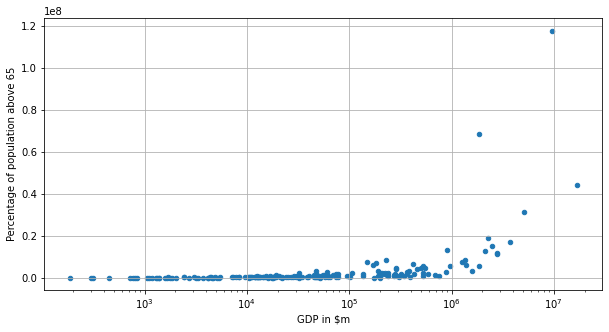

In [12]:
%matplotlib inline

df.plot(x=GDP, y=AGE, logx=True, kind='scatter', grid=True, figsize=(10,5))

There is a strong positive correlation between the percentage of population over 65 and the country's GDP.

As the GDP increases, so does the percentage of population of those over 65. 

This could be because a higher GDP indicateds the ability of access to healthcare and other factors that contribute to increased life expectancy.